In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
from datetime import datetime 
import seaborn as sbn

In [2]:
# Storing the datasets in pandas dataframes
train = pd.read_csv('/Users/yadushyadav/downloads/consumption_train.csv')
meta = pd.read_csv('/Users/yadushyadav/downloads/meta.csv')
test = pd.read_csv('/Users/yadushyadav/downloads/cold_start_test.csv')
sub = pd.read_csv('/Users/yadushyadav/downloads/submission_format.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509376 entries, 0 to 509375
Data columns (total 5 columns):
Unnamed: 0     509376 non-null int64
series_id      509376 non-null int64
timestamp      509376 non-null object
consumption    509376 non-null float64
temperature    280687 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 19.4+ MB


In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 10 columns):
series_id               1383 non-null int64
surface                 1383 non-null object
base_temperature        1383 non-null object
monday_is_day_off       1383 non-null bool
tuesday_is_day_off      1383 non-null bool
wednesday_is_day_off    1383 non-null bool
thursday_is_day_off     1383 non-null bool
friday_is_day_off       1383 non-null bool
saturday_is_day_off     1383 non-null bool
sunday_is_day_off       1383 non-null bool
dtypes: bool(7), int64(1), object(2)
memory usage: 41.9+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111984 entries, 0 to 111983
Data columns (total 5 columns):
Unnamed: 0     111984 non-null int64
series_id      111984 non-null int64
timestamp      111984 non-null object
consumption    111984 non-null float64
temperature    67068 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.3+ MB


In [6]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7529 entries, 0 to 7528
Data columns (total 6 columns):
pred_id              7529 non-null int64
series_id            7529 non-null int64
timestamp            7529 non-null object
temperature          4579 non-null float64
consumption          7529 non-null float64
prediction_window    7529 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 353.0+ KB


In [7]:
print(len(train['series_id'].unique()))
print(len(meta['series_id'].unique()))
print(len(test['series_id'].unique()))
print(len(sub['series_id'].unique()))

758
1383
625
625


In [8]:
train.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,103088,2014-12-24 00:00:00,101842.233424,NaN
1,1,103088,2014-12-24 01:00:00,105878.048906,NaN
2,2,103088,2014-12-24 02:00:00,91619.105008,NaN
3,3,103088,2014-12-24 03:00:00,94473.706203,NaN
4,4,103088,2014-12-24 04:00:00,96976.755526,NaN


In [9]:
meta.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,100003,x-large,low,False,False,False,False,False,True,True
1,100004,x-large,low,False,False,False,False,False,True,True
2,100006,x-small,low,False,False,False,False,False,True,True
3,100008,x-small,low,False,False,False,False,False,True,True
4,100010,x-small,low,False,False,False,False,False,True,True


In [10]:
test.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,102781,2013-02-27 00:00:00,15295.740389,17.00
1,1,102781,2013-02-27 01:00:00,15163.209562,18.25
2,2,102781,2013-02-27 02:00:00,15022.264079,18.00
3,3,102781,2013-02-27 03:00:00,15370.420458,17.00
4,4,102781,2013-02-27 04:00:00,15303.103213,16.90


In [11]:
# Combining the train and meta dataframes based on 'series_id'
df = pd.merge(train,meta,on='series_id')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509376 entries, 0 to 509375
Data columns (total 14 columns):
Unnamed: 0              509376 non-null int64
series_id               509376 non-null int64
timestamp               509376 non-null object
consumption             509376 non-null float64
temperature             280687 non-null float64
surface                 509376 non-null object
base_temperature        509376 non-null object
monday_is_day_off       509376 non-null bool
tuesday_is_day_off      509376 non-null bool
wednesday_is_day_off    509376 non-null bool
thursday_is_day_off     509376 non-null bool
friday_is_day_off       509376 non-null bool
saturday_is_day_off     509376 non-null bool
sunday_is_day_off       509376 non-null bool
dtypes: bool(7), float64(2), int64(2), object(3)
memory usage: 34.5+ MB


In [13]:
# Converting object type to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [14]:
df.head()

,Unnamed: 0,series_id,timestamp,consumption,temperature,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
0,0,103088,2014-12-24 00:00:00,101842.233424,NaN,x-small,low,False,False,False,False,False,True,True
1,1,103088,2014-12-24 01:00:00,105878.048906,NaN,x-small,low,False,False,False,False,False,True,True
2,2,103088,2014-12-24 02:00:00,91619.105008,NaN,x-small,low,False,False,False,False,False,True,True
3,3,103088,2014-12-24 03:00:00,94473.706203,NaN,x-small,low,False,False,False,False,False,True,True
4,4,103088,2014-12-24 04:00:00,96976.755526,NaN,x-small,low,False,False,False,False,False,True,True


In [15]:
df['timestamp'].max()

Timestamp('2017-12-29 23:00:00')

In [16]:
df['hour'] = df['timestamp'].dt.hour
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

In [17]:
sr = (df.groupby(['series_id'],sort=False).min()['timestamp']).to_frame().reset_index()

In [18]:
# First timestamp for each 'series_id'
dt = (df.groupby(['series_id'],sort=False).min()['timestamp']).to_dict()

In [19]:
# 'hour2' contains the difference between first timestamp of 'series_id' and the current one in hours

#temp = datetime(1970,1,1,0,0,0)

def func(x):
    return (x['timestamp']-dt[x['series_id']]).total_seconds()/3600
    
df['hour2'] = df.apply(lambda x: func(x),axis=1)

#df[['series_id','hour','hour2']].head(50)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509376 entries, 0 to 509375
Data columns (total 19 columns):
Unnamed: 0              509376 non-null int64
series_id               509376 non-null int64
timestamp               509376 non-null datetime64[ns]
consumption             509376 non-null float64
temperature             280687 non-null float64
surface                 509376 non-null object
base_temperature        509376 non-null object
monday_is_day_off       509376 non-null bool
tuesday_is_day_off      509376 non-null bool
wednesday_is_day_off    509376 non-null bool
thursday_is_day_off     509376 non-null bool
friday_is_day_off       509376 non-null bool
saturday_is_day_off     509376 non-null bool
sunday_is_day_off       509376 non-null bool
hour                    509376 non-null int64
year                    509376 non-null int64
month                   509376 non-null int64
day                     509376 non-null int64
hour2                   509376 non-null float64
dtype

In [21]:
print(df['temperature'].min(),df['temperature'].max())

-13.466666666666667 44.35


In [22]:
# Converting object type to int type
df['base_temperature'] = df['base_temperature'].replace(['low','high'],[0,1])

In [23]:
# Correlation between 'temperature' and 'base_temperature'
df['temperature'].corr(df['base_temperature'])

0.1308318434371858

In [24]:
df['surface'].value_counts(sort=False)

small        51072
x-small     113568
medium       59136
large        35616
x-large     146496
xx-large     39648
xx-small     63840
Name: surface, dtype: int64

In [25]:
# Converting object type to int type
df['surface'] = df['surface'].replace(['xx-large','x-large','large','medium','small','x-small','xx-small'],[6,5,4,3,2,1,0])

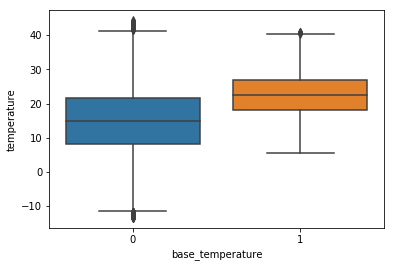

In [26]:
# The boxplot shows low 'base_temperature' indicates lower 'temperature' and vice versa
sbn.boxplot(df['base_temperature'],df['temperature'])

In [27]:
# Filling NaN values in 'temperature' using median of 'base_temperature'
df0 = df[df['base_temperature']==0]
df1 = df[df['base_temperature']==1]

base0 = df0['temperature'].median()
base1 = df1['temperature'].median()

def filltemp(x):
    if pd.isnull(x['temperature']):
        if x['base_temperature'] == 0:
            x['temperature'] = base0
        else:
            x['temperature'] = base1
    return x

df = df.apply(lambda x: filltemp(x), axis=1)

In [28]:
df.tail()

,Unnamed: 0,series_id,timestamp,consumption,temperature,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off,hour,year,month,day,hour2
509371,509371,103582,2017-12-18 19:00:00,99445.639414,15.0,3,0,False,False,False,False,False,True,True,19,2017,12,18,667.0
509372,509372,103582,2017-12-18 20:00:00,11604.814821,15.0,3,0,False,False,False,False,False,True,True,20,2017,12,18,668.0
509373,509373,103582,2017-12-18 21:00:00,10823.631017,15.0,3,0,False,False,False,False,False,True,True,21,2017,12,18,669.0
509374,509374,103582,2017-12-18 22:00:00,10273.037613,15.0,3,0,False,False,False,False,False,True,True,22,2017,12,18,670.0
509375,509375,103582,2017-12-18 23:00:00,8993.025597,15.0,3,0,False,False,False,False,False,True,True,23,2017,12,18,671.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509376 entries, 0 to 509375
Data columns (total 19 columns):
Unnamed: 0              509376 non-null int64
series_id               509376 non-null int64
timestamp               509376 non-null datetime64[ns]
consumption             509376 non-null float64
temperature             509376 non-null float64
surface                 509376 non-null int64
base_temperature        509376 non-null int64
monday_is_day_off       509376 non-null bool
tuesday_is_day_off      509376 non-null bool
wednesday_is_day_off    509376 non-null bool
thursday_is_day_off     509376 non-null bool
friday_is_day_off       509376 non-null bool
saturday_is_day_off     509376 non-null bool
sunday_is_day_off       509376 non-null bool
hour                    509376 non-null int64
year                    509376 non-null int64
month                   509376 non-null int64
day                     509376 non-null int64
hour2                   509376 non-null float64
dtypes:

In [30]:
test.head(25)

,Unnamed: 0,series_id,timestamp,consumption,temperature
0,0,102781,2013-02-27 00:00:00,15295.740389,17.00
1,1,102781,2013-02-27 01:00:00,15163.209562,18.25
2,2,102781,2013-02-27 02:00:00,15022.264079,18.00
3,3,102781,2013-02-27 03:00:00,15370.420458,17.00
4,4,102781,2013-02-27 04:00:00,15303.103213,16.90
5,5,102781,2013-02-27 05:00:00,14553.147024,17.00
6,6,102781,2013-02-27 06:00:00,40747.970202,17.00
7,7,102781,2013-02-27 07:00:00,91624.030364,16.90
8,8,102781,2013-02-27 08:00:00,99778.883564,17.00
9,9,102781,2013-02-27 09:00:00,104295.450008,19.00


### Applying the same transformations to the test dataframe

In [31]:
test['timestamp'] = pd.to_datetime(test['timestamp'])

In [32]:
test_dt = (test.groupby(['series_id'],sort=False).min()['timestamp']).to_dict()

In [33]:
def func(x):
    return (x['timestamp']-test_dt[x['series_id']]).total_seconds()/3600
    
test['hour2'] = test.apply(lambda x: func(x),axis=1)

In [34]:
dft = pd.merge(test,meta,on='series_id')

In [35]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111984 entries, 0 to 111983
Data columns (total 15 columns):
Unnamed: 0              111984 non-null int64
series_id               111984 non-null int64
timestamp               111984 non-null datetime64[ns]
consumption             111984 non-null float64
temperature             67068 non-null float64
hour2                   111984 non-null float64
surface                 111984 non-null object
base_temperature        111984 non-null object
monday_is_day_off       111984 non-null bool
tuesday_is_day_off      111984 non-null bool
wednesday_is_day_off    111984 non-null bool
thursday_is_day_off     111984 non-null bool
friday_is_day_off       111984 non-null bool
saturday_is_day_off     111984 non-null bool
sunday_is_day_off       111984 non-null bool
dtypes: bool(7), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 8.4+ MB


In [36]:
dft['base_temperature'] = dft['base_temperature'].replace(['low','high'],[0,1])

In [37]:
dft0 = dft[dft['base_temperature']==0]
dft1 = dft[dft['base_temperature']==1]

base0 = dft0['temperature'].median()
base1 = dft1['temperature'].median()

def filltemp(x):
    if pd.isnull(x['temperature']):
        if x['base_temperature'] == 0:
            x['temperature'] = base0
        else:
            x['temperature'] = base1
    return x

dft = dft.apply(lambda x: filltemp(x), axis=1)

In [38]:
dft['surface'].value_counts()

x-large     28608
x-small     27840
medium      14304
small       11856
large       10848
xx-small     9504
xx-large     9024
Name: surface, dtype: int64

In [39]:
dft['surface'] = dft['surface'].replace(['xx-large','x-large','large','medium','small','x-small','xx-small'],[6,5,4,3,2,1,0])

In [40]:
dft['hour'] = dft['timestamp'].dt.hour
dft['year'] = dft['timestamp'].dt.year
dft['month'] = dft['timestamp'].dt.month
dft['day'] = dft['timestamp'].dt.day

In [41]:
sub['prediction_window'].value_counts()

hourly    5808
daily     1337
weekly     384
Name: prediction_window, dtype: int64

In [42]:
df.shape[0]/168

3032.0

In [43]:
#df = df[cols]
#dft = df[cols]

In [44]:
type(df)

pandas.core.frame.DataFrame

In [45]:
def create_lagged_features(df, lag=1):
    if not type(df) == pd.DataFrame:
        df = pd.DataFrame(df, columns=['consumption'])
    
    def _rename_lag(ser, j):
        ser.name = ser.name + f'_{j}'
        return ser
    
    for i in range(1, lag + 1):
        df = df.join(df.consumption.shift(i).pipe(_rename_lag, i))

    df.dropna(inplace=True)
    return df

In [46]:
cols = df.columns
cols = cols.drop('timestamp')

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tqdm import tqdm

/Users/yadushyadav/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [48]:
from sklearn.preprocessing import MinMaxScaler

def prepare_training_data(consumption, lag):
    
    scaler = MinMaxScaler(feature_range=(-1, 1))
    consumption_vals = scaler.fit_transform(consumption.values.reshape(-1, 1))
    consumption_lagged = create_lagged_features(consumption_vals, lag=lag)

    X = consumption_lagged.drop('consumption', axis=1).values
    y = consumption_lagged.consumption.values

    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    return X, y, scaler

X, y, scaler = prepare_training_data(dft.consumption, 5)
print(X.shape)
print(y.shape)
print(scaler)

(111979, 1, 5)
(111979,)
MinMaxScaler(copy=True, feature_range=(-1, 1))


In [49]:
model = Sequential()
model.add(LSTM(24, batch_input_shape=(1,1,24),stateful=True))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [50]:
num_training_series = df.series_id.nunique()

for ser_id, ser_data in df.groupby('series_id'):
    X, y, scaler = prepare_training_data(ser_data.consumption, 24)
    model.fit(X, y, epochs=1, batch_size=1, verbose=0, shuffle=False)
    model.reset_states()

In [51]:
def generate_hourly_forecast(num_pred_hours, consumption, model, scaler, lag):
    
    preds_scaled = np.zeros(num_pred_hours)
    X = scaler.transform(consumption.values.reshape(-1, 1))[-lag:]

    for i in range(num_pred_hours):
        yhat = model.predict(X.reshape(1, 1, lag), batch_size=1)[0][0]
        preds_scaled[i] = yhat
        
        X = pd.Series(X.ravel()).shift(-1).fillna(yhat).values

    hourly_preds = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    return hourly_preds

In [52]:
%%time
pw_numpred = {'hourly': 24, 'daily': 7, 'weekly': 2}
pw_numpredhours = {'hourly': 24, 'daily': 7 * 24, 'weekly': 2 * 7 * 24}

sub = pd.read_csv('/Users/yadushyadav/downloads/submission_format.csv')
final = sub.copy()
num_test_series = final['series_id'].nunique()
lag = 24

model.reset_states()

for serid, pred_df in tqdm(final.groupby('series_id'), total=num_test_series, desc="Forecasting from Cold Start Data"):
        
    pred_window = pred_df.prediction_window.unique()[0]
    numpred = pw_numpred[pred_window]
    numpredhours = pw_numpredhours[pred_window]
    
    seriesdata = dft[dft['series_id'] == serid].consumption
    cold_X, cold_y, scaler = prepare_training_data(seriesdata, lag)
    
    model.fit(cold_X, cold_y, epochs=1, batch_size=1, verbose=0, shuffle=False)
    
    preds = generate_hourly_forecast(numpredhours, seriesdata, model, scaler, lag)
    
    reducedpreds = [pred.sum() for pred in np.split(preds, numpred)]
    
    serid_mask = final.series_id == serid
    final.loc[serid_mask, 'consumption'] = reducedpreds

Forecasting from Cold Start Data: 100%|██████████| 625/625 [04:34<00:00,  2.17it/s]

CPU times: user 7min 34s, sys: 1min 48s, total: 9min 23s
Wall time: 4min 34s


In [53]:
final.to_csv('/Users/yadushyadav/Downloads/powersublstm.csv',index=False)